In [1]:
# Import libraries with specific purposes in mind
import sys
import pandas as pd              # For data manipulation
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import sklearn
import imblearn
import seaborn as sns           # For attractive statistical plots
from ucimlrepo import fetch_ucirepo

In [2]:
print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Imbalanced-learn version: {imblearn.__version__}")

Python version: 3.12.3 (main, Feb  4 2025, 14:48:35) [GCC 13.3.0]
NumPy version: 2.3.0
Pandas version: 2.3.0
Scikit-learn version: 1.6.1
Imbalanced-learn version: 0.13.0


In [3]:
# testing basic operations
data = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'income': np.random.choice([0, 1], 100)
})

print("Test dataframe created successfully!")
print(data.head())
print(f"\nGender distribution:\n{data['gender'].value_counts()}")


Test dataframe created successfully!
   feature1  feature2  gender  income
0 -1.355710  1.132666  Female       1
1 -0.874726  0.023830    Male       1
2 -1.567351  0.239379  Female       1
3  1.180416 -1.132846  Female       0
4  0.452116  2.802885    Male       1

Gender distribution:
gender
Female    52
Male      48
Name: count, dtype: int64


In [4]:
print("Downloading UCI Adult dataset...")

# Fetch the dataset using its ID (2)
adult = fetch_ucirepo(id=2)

# The fetch_ucirepo function returns an object with several components
print("\nDataset downloaded successfully!")
print(f"Dataset name: {adult.metadata['name']}")
print(f"Dataset description: {adult.metadata['abstract'][:200]}...")


Dataset downloaded successfully!
Dataset name: Adult
Dataset description: Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ...


In [5]:
# Extract the main components
X = adult.data.features  # Features (independent variables)
y = adult.data.targets   # Target (dependent variable - income)

print(f"\nDataset shape: {X.shape}")
print(f"This means we have {X.shape[0]:,} individuals and {X.shape[1]} features about each person")


Dataset shape: (48842, 14)
This means we have 48,842 individuals and 14 features about each person


In [6]:
print("Features (X) Preview:")
display(X.head())  # First 5 rows of features

Features (X) Preview:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [7]:
print("\nTarget (y) Preview:")
display(y.head())  # First 5 rows of target


Target (y) Preview:


,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [8]:
print("\nFeatures Summary:")
display(X.describe(include='all'))  # Stats for numeric AND categorical features


Features Summary:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [9]:
print("\nTarget Summary:")
display(y.describe(include='all'))  # Stats for target variable


Target Summary:


,income
count,48842
unique,4
top,<=50K
freq,24720


#### checking dimensions and metadata

In [10]:
print(f"X shape: {X.shape}")  # (rows, columns)
print(f"y shape: {y.shape}")  # (rows, columns)
print("\nX Columns:", X.columns.tolist())
print("y Column:", y.columns.tolist())

X shape: (48842, 14)
y shape: (48842, 1)

X Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
y Column: ['income']


In [11]:
print("Features in our dataset:")
print("=" * 60)

# Create a feature information summary
feature_info = pd.DataFrame({
    'Feature': X.columns,
    'Type': X.dtypes,
    'Unique_Values': [X[col].nunique() for col in X.columns],
    'Missing_Values': [X[col].isna().sum() for col in X.columns],
    'Missing_Percentage': [f"{(X[col].isna().sum() / len(X)) * 100:.1f}%" for col in X.columns]
})

print(feature_info.to_string())

print(f"\n\nTarget variable (income) distribution:")
print(y.value_counts())
print(f"\nPercentage earning >50K: {(y.values == '>50K').mean() * 100:.2f}%")

Features in our dataset:
                       Feature    Type  Unique_Values  Missing_Values Missing_Percentage
age                        age   int64             74               0               0.0%
workclass            workclass  object              9             963               2.0%
fnlwgt                  fnlwgt   int64          28523               0               0.0%
education            education  object             16               0               0.0%
education-num    education-num   int64             16               0               0.0%
marital-status  marital-status  object              7               0               0.0%
occupation          occupation  object             15             966               2.0%
relationship      relationship  object              6               0               0.0%
race                      race  object              5               0               0.0%
sex                        sex  object              2               0               0

## feature desciption 

In [12]:


feature_descriptions = {
    'age': "Continuous variable. Important for understanding career stage and earning potential.",
    'workclass': "Employment sector. Shows if gender bias varies by employer type (private, government, etc.)",
    'fnlwgt': "Final weight - represents how many people in the population this person represents. Critical for accurate statistics.",
    'education': "Highest education level. May reveal gender disparities in educational opportunities.",
    'education-num': "Numerical encoding of education. Useful for ordered analysis.",
    'marital-status': "Marital status. Often shows different patterns for men and women in career progression.",
    'occupation': "Job type. Key for identifying occupational segregation by gender.",
    'relationship': "Family role. Can reveal societal expectations by gender.",
    'race': "Racial category. Important for intersectional analysis with gender.",
    'sex': "THE KEY VARIABLE - the protected attribute analyzing for bias.",
    'capital-gain': "Investment income. May show wealth accumulation differences by gender.",
    'capital-loss': "Investment losses. Part of the complete financial picture.",
    'hours-per-week': "Work hours. Can reveal work-life balance differences by gender.",
    'native-country': "Country of origin. Useful for understanding immigrant status effects."
}

for feature, description in feature_descriptions.items():
    if feature in X.columns:
        print(f"\n{feature.upper()}:")
        print(f"  Description: {description}")
        if X[feature].dtype == 'object':
            print(f"  Sample values: {X[feature].value_counts().head(3).index.tolist()}")
        else:
            print(f"  Range: {X[feature].min()} to {X[feature].max()}")



AGE:
  Description: Continuous variable. Important for understanding career stage and earning potential.
  Range: 17 to 90

WORKCLASS:
  Description: Employment sector. Shows if gender bias varies by employer type (private, government, etc.)
  Sample values: ['Private', 'Self-emp-not-inc', 'Local-gov']

FNLWGT:
  Description: Final weight - represents how many people in the population this person represents. Critical for accurate statistics.
  Range: 12285 to 1490400

EDUCATION:
  Description: Highest education level. May reveal gender disparities in educational opportunities.
  Sample values: ['HS-grad', 'Some-college', 'Bachelors']

EDUCATION-NUM:
  Description: Numerical encoding of education. Useful for ordered analysis.
  Range: 1 to 16

MARITAL-STATUS:
  Description: Marital status. Often shows different patterns for men and women in career progression.
  Sample values: ['Married-civ-spouse', 'Never-married', 'Divorced']

OCCUPATION:
  Description: Job type. Key for identifying 

In [13]:
# Gender distribution analysis
gender_analysis = pd.DataFrame()

# Basic gender distribution
gender_counts = X['sex'].value_counts()
gender_analysis['Count'] = gender_counts
gender_analysis['Percentage'] = (gender_counts / len(X) * 100).round(2)

In [14]:
print("Gender Distribution in Dataset:")
print(gender_analysis)
print(f"\nGender Ratio (Male:Female): {gender_counts['Male']/gender_counts['Female']:.2f}:1")

Gender Distribution in Dataset:
        Count  Percentage
sex                      
Male    32650       66.85
Female  16192       33.15

Gender Ratio (Male:Female): 2.02:1


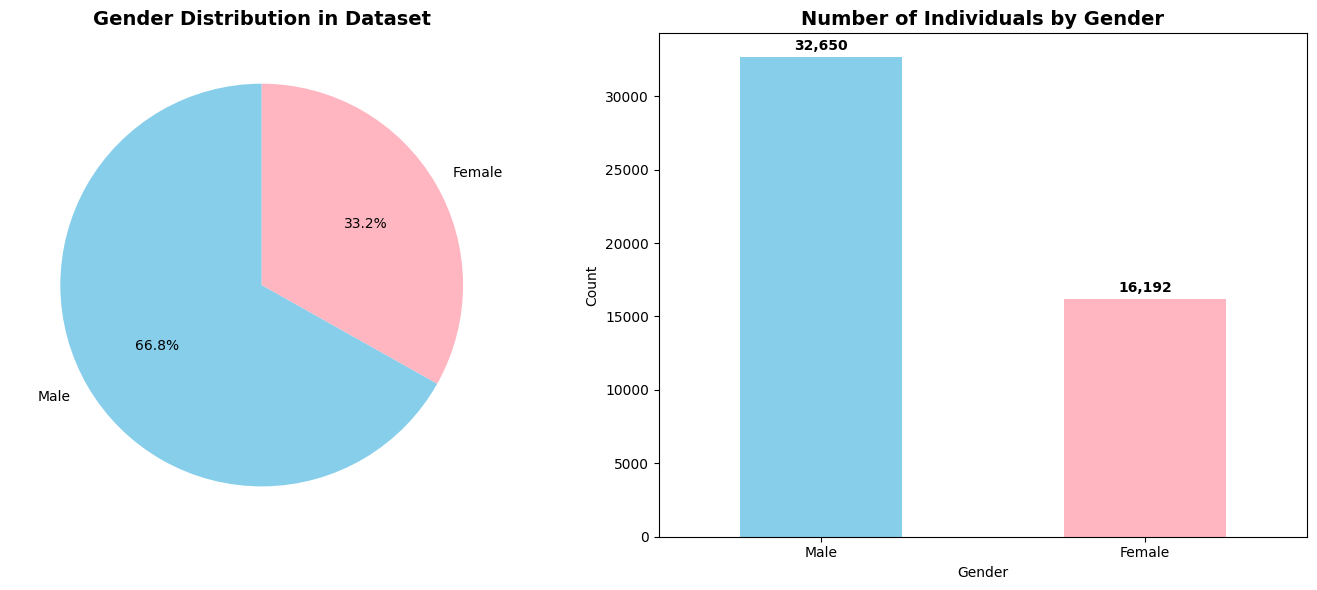

In [15]:
# Visualize this distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for overall distribution
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightpink'], startangle=90)
ax1.set_title('Gender Distribution in Dataset', fontsize=14, fontweight='bold')

# Bar chart for counts
gender_counts.plot(kind='bar', ax=ax2, color=['skyblue', 'lightpink'])
ax2.set_title('Number of Individuals by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=0)

# Add count labels on bars
for i, v in enumerate(gender_counts.values):
    ax2.text(i, v + 500, str(f'{v:,}'), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Income Distribution by Gender (Percentage):
income  <=50K  <=50K.   >50K  >50K.
sex                                
Female  59.24   29.84   7.28   3.64
Male    46.33   23.29  20.40   9.97

Key Bias Metrics:
  Female high income rate: 7.28%
  Male high income rate: 20.40%
  Disparate Impact Ratio: 0.357

Interpretation: Women are 64.3% less likely to earn >50K


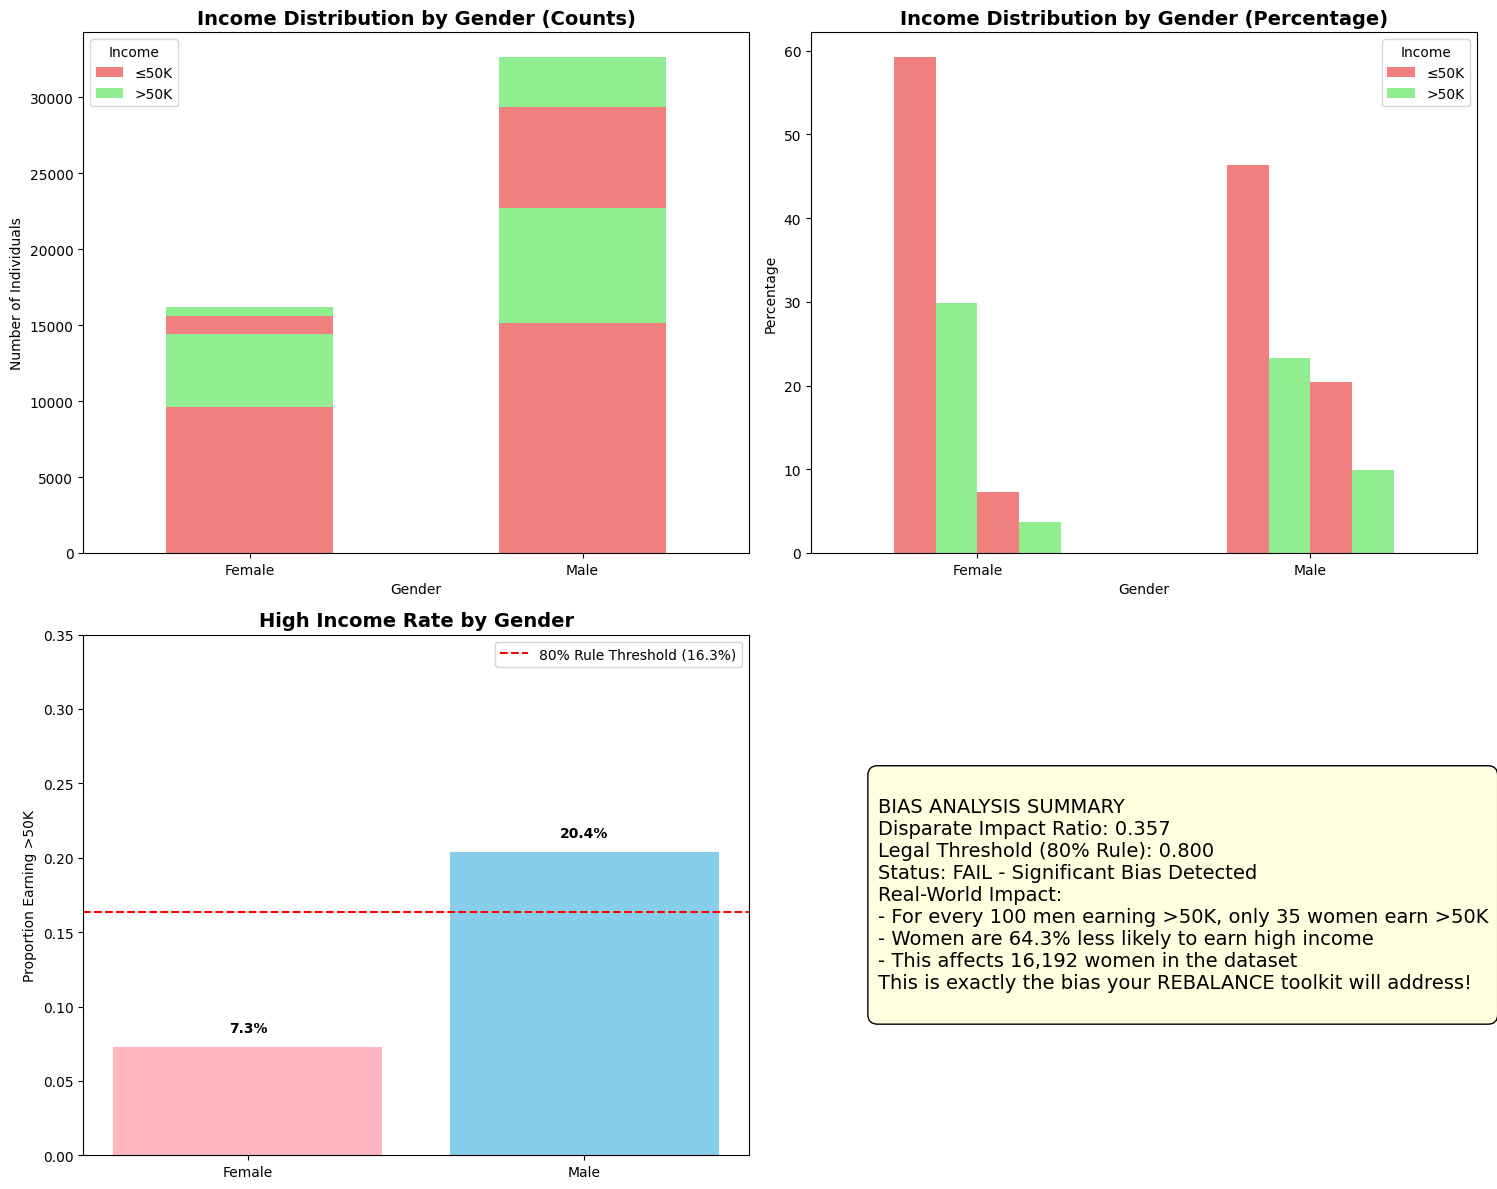

In [25]:
# Income distribution by gender - THE KEY BIAS INDICATOR
# Create a comprehensive gender-income analysis
# Extract the first column of y as a Series
y_series = y.iloc[:, 0]
gender_counts = X['sex'].value_counts()  # Added to define gender_counts

gender_income_crosstab = pd.crosstab(X['sex'], y_series, normalize='index') * 100
print("Income Distribution by Gender (Percentage):")
print(gender_income_crosstab.round(2))

# Calculate the disparate impact ratio
female_high_income_rate = (y_series[X['sex'] == 'Female'] == '>50K').mean()
male_high_income_rate = (y_series[X['sex'] == 'Male'] == '>50K').mean()
disparate_impact_ratio = female_high_income_rate / male_high_income_rate

print(f"\nKey Bias Metrics:")
print(f"  Female high income rate: {female_high_income_rate:.2%}")
print(f"  Male high income rate: {male_high_income_rate:.2%}")
print(f"  Disparate Impact Ratio: {disparate_impact_ratio:.3f}")
print(f"\nInterpretation: Women are {(1-disparate_impact_ratio)*100:.1f}% less likely to earn >50K")

# Visualization code remains the same as before
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# 1. Stacked bar chart
gender_income_counts = pd.crosstab(X['sex'], y_series)
gender_income_counts.plot(kind='bar', stacked=True, ax=axes[0, 0],
                          color=['lightcoral', 'lightgreen'])
axes[0, 0].set_title('Income Distribution by Gender (Counts)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Number of Individuals')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].legend(title='Income', labels=['≤50K', '>50K'])
# 2. Percentage bar chart
gender_income_crosstab.plot(kind='bar', ax=axes[0, 1], color=['lightcoral', 'lightgreen'])
axes[0, 1].set_title('Income Distribution by Gender (Percentage)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].legend(title='Income', labels=['≤50K', '>50K'])
# 3. Disparate Impact Visualization
di_data = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'High_Income_Rate': [female_high_income_rate, male_high_income_rate]
})
bars = axes[1, 0].bar(di_data['Gender'], di_data['High_Income_Rate'],
                      color=['lightpink', 'skyblue'])
axes[1, 0].set_title('High Income Rate by Gender', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Proportion Earning >50K')
axes[1, 0].set_ylim(0, 0.35)
# Add percentage labels on bars
for bar, rate in zip(bars, di_data['High_Income_Rate']):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{rate:.1%}', ha='center', fontweight='bold')
# Add disparate impact line
axes[1, 0].axhline(y=male_high_income_rate * 0.8, color='red', linestyle='--',
                   label=f'80% Rule Threshold ({male_high_income_rate * 0.8:.1%})')
axes[1, 0].legend()
# 4. Bias Summary
axes[1, 1].axis('off')
bias_summary = f"""
BIAS ANALYSIS SUMMARY
Disparate Impact Ratio: {disparate_impact_ratio:.3f}
Legal Threshold (80% Rule): 0.800
Status: {'FAIL - Significant Bias Detected' if disparate_impact_ratio < 0.8 else 'PASS'}
Real-World Impact:
- For every 100 men earning >50K, only {int(disparate_impact_ratio * 100)} women earn >50K
- Women are {(1-disparate_impact_ratio)*100:.1f}% less likely to earn high income
- This affects {gender_counts['Female']:,} women in the dataset
This is exactly the bias your REBALANCE toolkit will address!
"""
axes[1, 1].text(0.1, 0.5, bias_summary, fontsize=14, verticalalignment='center',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"))
plt.tight_layout()
plt.show()


In [29]:
 # Gender bias across different dimensions

def analyze_gender_bias_by_feature(feature_name, top_n=10):
    """
    Analyze how gender bias manifests across different values of a feature
    """
    print(f"\nAnalyzing Gender Bias in {feature_name.upper()}")
    print("=" * 70)

    # Get unique values (limit to top N for categorical features)
    if X[feature_name].dtype == 'object':
        values = X[feature_name].value_counts().head(top_n).index
    else:
        values = pd.qcut(X[feature_name], q=5, duplicates='drop').unique()

    bias_analysis = []

    for value in values:
        if X[feature_name].dtype == 'object':
            mask = X[feature_name] == value
        else:
            mask = (X[feature_name] > value.left) & (X[feature_name] <= value.right)

        female_mask = mask & (X['sex'] == 'Female')
        male_mask = mask & (X['sex'] == 'Male')

        # Fixed lines - replaced [0] with .iloc[0]
        female_rate = (y[female_mask] == '>50K').mean().iloc[0] if female_mask.sum() > 0 else 0
        male_rate = (y[male_mask] == '>50K').mean().iloc[0] if male_mask.sum() > 0 else 0

        di_ratio = female_rate / male_rate if male_rate > 0 else 0

        bias_analysis.append({
            feature_name: str(value),
            'Female_Count': female_mask.sum(),
            'Male_Count': male_mask.sum(),
            'Female_>50K_Rate': f"{female_rate:.1%}",
            'Male_>50K_Rate': f"{male_rate:.1%}",
            'Disparate_Impact': f"{di_ratio:.3f}"
        })

    bias_df = pd.DataFrame(bias_analysis)
    print(bias_df.to_string(index=False))

    if not bias_df.empty:
        worst_bias = bias_df.loc[bias_df['Disparate_Impact'].astype(float).idxmin()]
        print(f"\nWorst bias in {feature_name}: {worst_bias[feature_name]} "
              f"(DI = {worst_bias['Disparate_Impact']})")

# Analyze key features
for feature in ['education', 'occupation', 'marital-status', 'age']:
    if feature in X.columns:
        analyze_gender_bias_by_feature(feature)



Analyzing Gender Bias in EDUCATION
   education  Female_Count  Male_Count Female_>50K_Rate Male_>50K_Rate Disparate_Impact
     HS-grad          5097       10687             4.4%          13.6%            0.327
Some-college          4178        6700             4.7%          17.8%            0.265
   Bachelors          2477        5548            13.7%          33.9%            0.403
     Masters           845        1812            21.2%          43.0%            0.492
   Assoc-voc           734        1327             9.1%          22.2%            0.412
        11th           650        1162             1.2%           4.5%            0.275
  Assoc-acdm           627         974             8.9%          21.5%            0.416
        10th           457         932             0.7%           6.3%            0.104
     7th-8th           239         716             0.4%           5.4%            0.077
 Prof-school           132         702            31.8%          54.3%            0.

In [31]:
# Saving the data locally
import os
import json

# Convert y to a Series if it's a DataFrame with one column
if isinstance(y, pd.DataFrame):
    y_series = y.iloc[:, 0]
else:
    y_series = y  # in case y is already a Series

# Create processed data with gender bias labels for easy access
data_with_labels = X.copy()
data_with_labels['income'] = y_series.values
data_with_labels['high_income'] = (y_series.values == '>50K').astype(int)
# Add bias indicator for analysis
data_with_labels['is_female_high_income'] = (
    (data_with_labels['sex'] == 'Female') &
    (data_with_labels['high_income'] == 1)
).astype(int)

# Save to CSV files
print("Saving data files...")
# Save raw data
X.to_csv('../data/raw/adult_features.csv', index=False)
# Save target as a Series (single column)
pd.Series(y_series.values, name='income').to_csv('../data/raw/adult_target.csv', index=False, header=True)
# Save processed data with labels
data_with_labels.to_csv('../data/processed/adult_with_labels.csv', index=False)

# Save metadata
metadata = {
    'total_samples': len(X),
    'features': list(X.columns),
    'gender_distribution': gender_counts.to_dict(),
    'income_distribution': y_series.value_counts().to_dict(),
    'disparate_impact_ratio': disparate_impact_ratio,
    'female_high_income_rate': float(female_high_income_rate),  # Convert numpy types to Python native types for JSON
    'male_high_income_rate': float(male_high_income_rate)
}
os.makedirs('../data/processed', exist_ok=True)  # Ensure directory exists
with open('../data/processed/dataset_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print("Data saved successfully!")
print(f"  - Raw features: data/raw/adult_features.csv")
print(f"  - Raw targets: data/raw/adult_target.csv")
print(f"  - Processed data: data/processed/adult_with_labels.csv")
print(f"  - Metadata: data/processed/dataset_metadata.json")


Saving data files...
Data saved successfully!
  - Raw features: data/raw/adult_features.csv
  - Raw targets: data/raw/adult_target.csv
  - Processed data: data/processed/adult_with_labels.csv
  - Metadata: data/processed/dataset_metadata.json


In [33]:
# Cell 9: Summary of findings
summary = f"""
KEY FINDINGS FROM UCI ADULT DATASET EXPLORATION
1. DATASET COMPOSITION:
   - Total individuals: {len(X):,}
   - Gender split: {gender_counts['Male']:,} men ({(gender_counts['Male']/len(X)*100):.1f}%),
                   {gender_counts['Female']:,} women ({(gender_counts['Female']/len(X)*100):.1f}%)
   - Clear male overrepresentation (2:1 ratio)
2. BIAS METRICS:
   - Disparate Impact Ratio: {disparate_impact_ratio:.3f} (FAILS 80% rule)
   - Women are {(1-disparate_impact_ratio)*100:.1f}% less likely to earn >50K
   - Only {female_high_income_rate:.1%} of women earn >50K vs {male_high_income_rate:.1%} of men
3. INTERSECTIONAL PATTERNS:
   - Bias varies significantly across occupations
   - Education doesn't eliminate bias - it exists at all education levels
   - Marital status shows different patterns for men and women
4. IMPLICATIONS FOR YOUR FAIRNESS-AWARE SMOTE:
   - Need to generate ~3x more high-income female samples
   - Must preserve occupation-gender relationships when generating samples
   - Should consider age and education distributions within gender groups
   - Critical to maintain realistic feature combinations
5. CHALLENGES TO ADDRESS:
   - Severe underrepresentation of high-income women ({(y.iloc[:, 0][X['sex'] == 'Female'] == '>50K').sum()} total)
   - Risk of overfitting if synthetic samples aren't diverse enough
   - Need to balance statistical fairness with model performance
This analysis provides the foundation for understanding what bias your toolkit needs to address!
"""
print(summary)
# Save summary to file
with open('../data/processed/exploration_summary.txt', 'w') as f:
    f.write(summary)



KEY FINDINGS FROM UCI ADULT DATASET EXPLORATION
1. DATASET COMPOSITION:
   - Total individuals: 48,842
   - Gender split: 32,650 men (66.8%),
                   16,192 women (33.2%)
   - Clear male overrepresentation (2:1 ratio)
2. BIAS METRICS:
   - Disparate Impact Ratio: 0.357 (FAILS 80% rule)
   - Women are 64.3% less likely to earn >50K
   - Only 7.3% of women earn >50K vs 20.4% of men
3. INTERSECTIONAL PATTERNS:
   - Bias varies significantly across occupations
   - Education doesn't eliminate bias - it exists at all education levels
   - Marital status shows different patterns for men and women
4. IMPLICATIONS FOR YOUR FAIRNESS-AWARE SMOTE:
   - Need to generate ~3x more high-income female samples
   - Must preserve occupation-gender relationships when generating samples
   - Should consider age and education distributions within gender groups
   - Critical to maintain realistic feature combinations
5. CHALLENGES TO ADDRESS:
   - Severe underrepresentation of high-income women 